In [5]:
# make linspace 
import numpy as np
import matplotlib.pyplot as plt

# For this last question I want you to make the data. Consider the function f(x) = .3 − 1.2x.
# Let xi = i/200 for i = 1, 2, . . . , 1000, and define random variables Yi by
# Yi = f(xi) + ϵi

xis = np.linspace(1, 5, 200)

# f(x) = .3 - 1.2x
Y = [.3 - 1.2*i for i in xis]

# make a dsgin matrix with 200 rows, 1 in the first column and xis in the second column
X = np.array([[1, i] for i in xis])


In [7]:
# calcualte beta hat 
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y
print(beta_hat)

[ 0.3 -1.2]


[[ 200.          600.        ]
 [ 600.         2069.34673367]]
RSS:  2.0598267570968585e-27


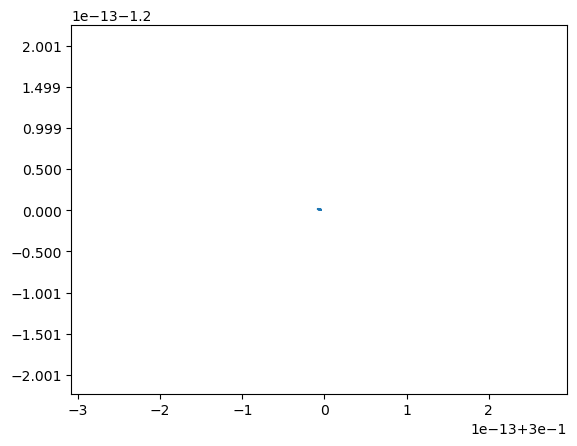

In [ ]:

eigvals, eigvecs = np.linalg.eig((X.T @ X))
sigma_neg_half = eigvecs @ np.diag(1/np.sqrt(eigvals)) @ eigvecs.T
RSS = np.sum((Y - X @ beta_hat)**2)
print("RSS: ", RSS)
n = 200
S2 = RSS / (n - 2)
# making the confidence ellipsoid: beta_hat +- sqrt(chi_2(alpha = .05, p=3)) * S^{-1/2}

# make circle of radius sqrt chi_2(alpha = .05 /2 ), p=2 = 7.378
radius = np.sqrt(7.378)

# make ellipse by applying sigma_neg_half to a circle
theta = np.linspace(0, 2*np.pi, 100)
circle = np.array([radius*np.cos(theta), radius*np.sin(theta)])
ellipse = np.sqrt(S2)*sigma_neg_half @ circle

# plot the ellipse
plt.plot(beta_hat[0] + ellipse[0], beta_hat[1] + ellipse[1])

plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()